In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [10]:
# Loading dataset
coal_data = pd.read_csv("C:/Users/Admin/coal_dataset.csv")
coal_data

,srcStateName,srcYear,Types of coal,Coal Consuming Sectors,Coal Consumed,YearCode,Year
0,PUNJAB,2011,RAW COAL,POWER (UTILITY),12.545,2011,"Financial Year (Apr - Mar), 2011"
1,ANDHRA PRADESH,2011,RAW COAL,POWER (CAPTIVE),3.363,2011,"Financial Year (Apr - Mar), 2011"
2,ASSAM,2011,RAW COAL,PULP & PAPER,0.095,2011,"Financial Year (Apr - Mar), 2011"
3,PUNJAB,2011,RAW COAL,FERTILISERS,1.111,2011,"Financial Year (Apr - Mar), 2011"
4,DELHI,2011,WASHED COAL,POWER (UTILITY),1.599,2011,"Financial Year (Apr - Mar), 2011"
...,...,...,...,...,...,...,...
1622,WEST BENGAL,2020,WASHED COAL,METALLURGICAL USE- DIRECT FEED,0.169,2020,"Financial Year (Apr - Mar), 2020"
1623,MAHARASHTRA,2020,WASHED COAL,POWER (CAPTIVE),0.032,2020,"Financial Year (Apr - Mar), 2020"
1624,TAMILNADU,2020,LIGNITE,BRICKS,0.011,2020,"Financial Year (Apr - Mar), 2020"
1625,ODISHA,2020,RAW COAL,COLLIERY OWN - CONSUMPTION,0.002,2020,"Financial Year (Apr - Mar), 2020"


In [11]:
display(coal_data.head())# Display first few rows

,srcStateName,srcYear,Types of coal,Coal Consuming Sectors,Coal Consumed,YearCode,Year
0,PUNJAB,2011,RAW COAL,POWER (UTILITY),12.545,2011,"Financial Year (Apr - Mar), 2011"
1,ANDHRA PRADESH,2011,RAW COAL,POWER (CAPTIVE),3.363,2011,"Financial Year (Apr - Mar), 2011"
2,ASSAM,2011,RAW COAL,PULP & PAPER,0.095,2011,"Financial Year (Apr - Mar), 2011"
3,PUNJAB,2011,RAW COAL,FERTILISERS,1.111,2011,"Financial Year (Apr - Mar), 2011"
4,DELHI,2011,WASHED COAL,POWER (UTILITY),1.599,2011,"Financial Year (Apr - Mar), 2011"


In [34]:
# 1. ANALYZING COAL CONSUMPTION BY SECTOR

print("Descriptive Statistics:")
print(coal_data.groupby('Coal Consuming Sectors')['Coal Consumed'].describe())

Descriptive Statistics:
                                count       mean        std    min      25%  \
Coal Consuming Sectors                                                        
BRICKS                           67.0   0.200537   0.447226  0.000  0.00700   
CEMENT                          215.0   0.495405   0.771402  0.000  0.03000   
CHEMICAL                        107.0   0.071748   0.154812  0.000  0.00700   
COKERIES                          5.0   0.629800   0.542499  0.046  0.51300   
COLLIERY OWN - CONSUMPTION       44.0   0.037750   0.062723  0.001  0.00400   
COLLIERY STAFF                    1.0   0.002000        NaN  0.002  0.00200   
FERTILISERS                      74.0   0.307432   0.272951  0.000  0.03800   
METALLURGICAL USE- COKERIES      84.0   0.575024   0.869748  0.001  0.03675   
METALLURGICAL USE- DIRECT FEED   63.0   0.255317   0.708910  0.002  0.07750   
POWER (CAPTIVE)                 255.0   4.996278  11.379530  0.001  0.26300   
POWER (UTILITY)             

In [36]:
# ANOVA Test to compare means across sectors
sector_groups = [group['Coal Consumed'].values for _, group in coal_data.groupby('Coal Consuming Sectors')]
from scipy import stats
anova_result = stats.f_oneway(*sector_groups)
print("ANOVA Test Result (Sector-wise Coal Consumption):", anova_result)

ANOVA Test Result (Sector-wise Coal Consumption): F_onewayResult(statistic=40.87173414384029, pvalue=5.97761499393623e-96)


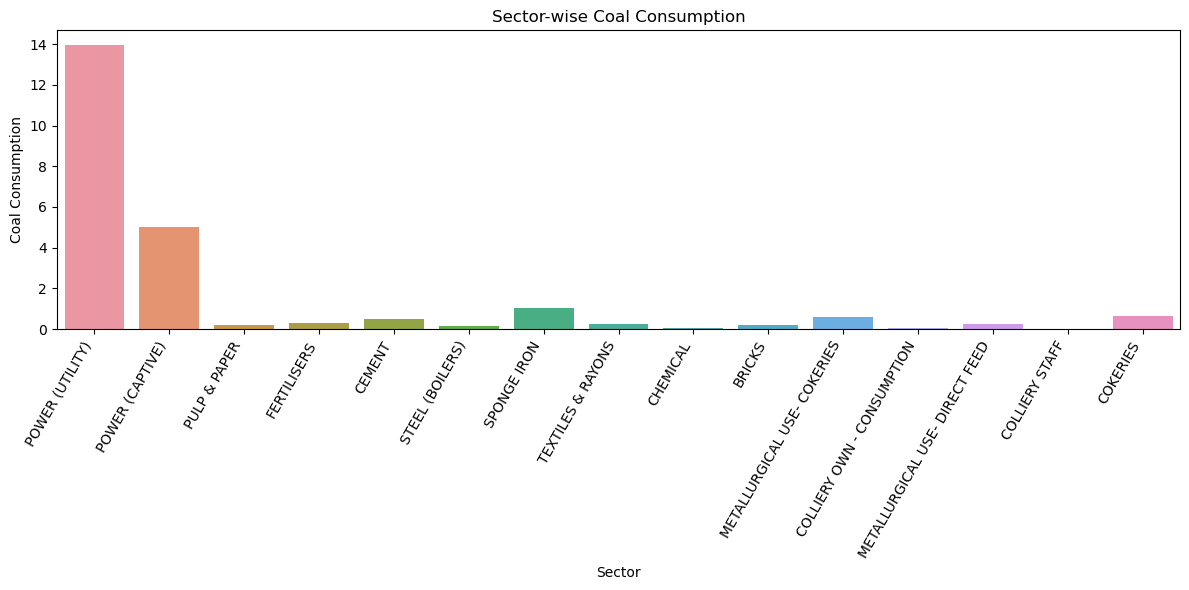

In [40]:
# Bar Chart: Sector-wise Coal Consumption
plt.figure(figsize=(12, 6))
sns.barplot(x='Coal Consuming Sectors', y='Coal Consumed', data=coal_data, errorbar=None)
plt.xticks(rotation=60, ha='right')
plt.title("Sector-wise Coal Consumption")
plt.xlabel("Sector")
plt.ylabel("Coal Consumption")
plt.tight_layout()
plt.show()

In [41]:
# 2. DETERMINING MOST-USED COAL TYPES BY SECTOR

coal_type_usage = coal_data.groupby(['Coal Consuming Sectors', 'Types of coal'])['Coal Consumed'].sum().reset_index()
most_used_coal = coal_type_usage.loc[coal_type_usage.groupby('Coal Consuming Sectors')['Coal Consumed'].idxmax()]
print("Most Used Coal Type for Each Sectors:")
print(most_used_coal)

Most Used Coal Type for Each Sectors:
            Coal Consuming Sectors Types of coal  Coal Consumed
2                           BRICKS      RAW COAL          7.079
6                           CEMENT      RAW COAL         95.825
8                         CHEMICAL       LIGNITE          4.353
11                        COKERIES   WASHED COAL          2.590
12      COLLIERY OWN - CONSUMPTION      RAW COAL          1.660
14                  COLLIERY STAFF      RAW COAL          0.002
16                     FERTILISERS      RAW COAL         22.691
19     METALLURGICAL USE- COKERIES   WASHED COAL         40.233
21  METALLURGICAL USE- DIRECT FEED      RAW COAL         13.033
25                 POWER (CAPTIVE)      RAW COAL       1089.747
29                 POWER (UTILITY)      RAW COAL       3870.058
32                    PULP & PAPER      RAW COAL         17.300
35                     SPONGE IRON      RAW COAL        110.082
39                 STEEL (BOILERS)      RAW COAL          5.311
40

In [45]:
# Chi-square test for dependency between sector and coal type
from scipy.stats import chi2_contingency

contingency_table = pd.pivot_table(coal_data, values='Coal Consumed', index='Coal Consuming Sectors', columns='Types of coal', aggfunc=np.sum, fill_value=0)
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
print("Chi-Square Test Result (Sector vs. Coal Type):", chi2_stat, "p-value:", p_val)

Chi-Square Test Result (Sector vs. Coal Type): 1464.5502482981244 p-value: 7.876345994687955e-280


<Figure size 1200x600 with 0 Axes>

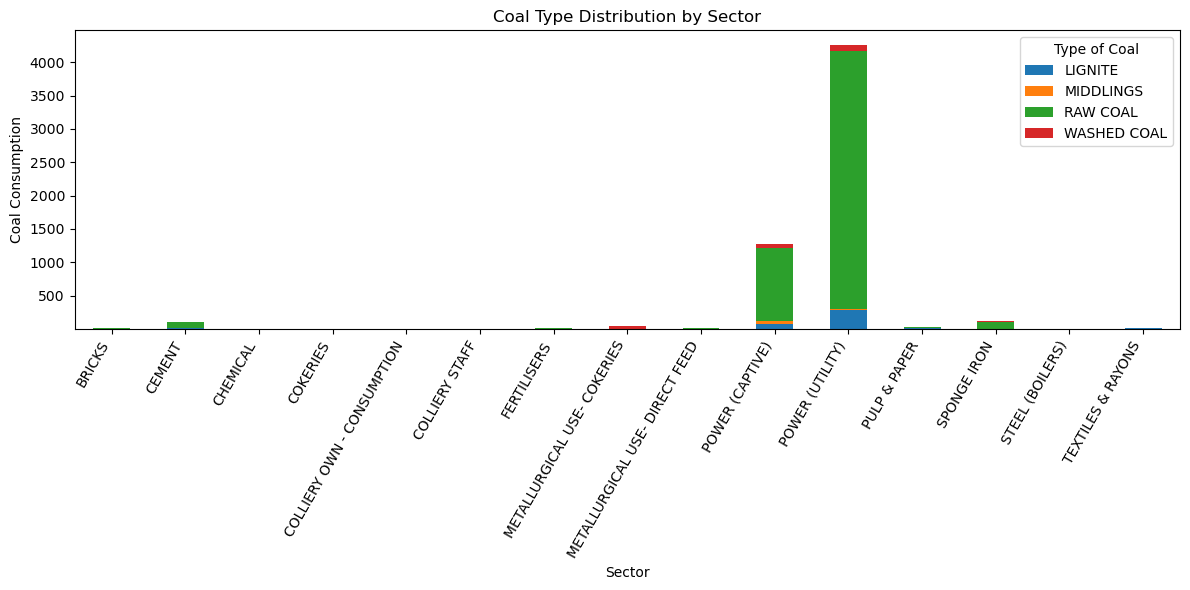

In [46]:
# Stacked Bar Chart for Coal Type Distribution
plt.figure(figsize=(12, 6))
coal_pivot = coal_data.pivot_table(values='Coal Consumed', index='Coal Consuming Sectors', columns='Types of coal', aggfunc='sum', fill_value=0)
coal_pivot.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title("Coal Type Distribution by Sector")
plt.xlabel("Sector")
plt.ylabel("Coal Consumption")
plt.xticks(rotation=60, ha='right')
plt.legend(title="Type of Coal")
plt.tight_layout()
plt.show()


In [48]:
# 3. RANKING SECTORS BASED ON COAL DEPENDENCY (Using Z-score Standardization)

coal_dependency = coal_data.groupby('Coal Consuming Sectors')['Coal Consumed'].sum().reset_index()
coal_dependency['Z-Score'] = (coal_dependency['Coal Consumed'] - coal_dependency['Coal Consumed'].mean()) / coal_dependency['Coal Consumed'].std()
coal_dependency['Rank'] = coal_dependency['Z-Score'].rank(method='dense', ascending=False)
print("Sector-wise Coal Dependency Ranking (Based on Z-Score):")
print(coal_dependency.sort_values(by='Rank'))

Sector-wise Coal Dependency Ranking (Based on Z-Score):
            Coal Consuming Sectors  Coal Consumed   Z-Score  Rank
10                 POWER (UTILITY)       4264.163  3.461220   1.0
9                  POWER (CAPTIVE)       1274.051  0.785852   2.0
12                     SPONGE IRON        121.712 -0.245190   3.0
1                           CEMENT        106.512 -0.258790   4.0
7      METALLURGICAL USE- COKERIES         48.302 -0.310872   5.0
11                    PULP & PAPER         25.988 -0.330837   6.0
14               TEXTILES & RAYONS         22.869 -0.333628   7.0
6                      FERTILISERS         22.750 -0.333735   8.0
8   METALLURGICAL USE- DIRECT FEED         16.085 -0.339698   9.0
0                           BRICKS         13.436 -0.342068  10.0
13                 STEEL (BOILERS)          7.848 -0.347068  11.0
2                         CHEMICAL          7.677 -0.347221  12.0
3                         COKERIES          3.149 -0.351272  13.0
4       COLLIERY OWN

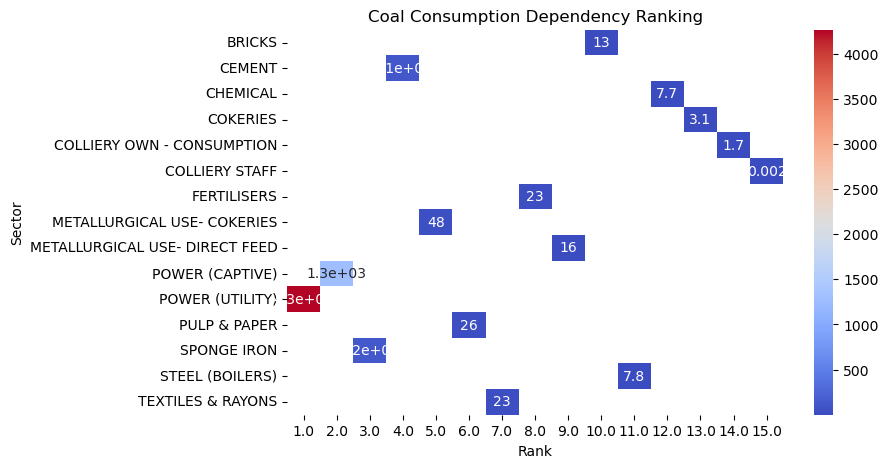

In [49]:
# Heatmap for Coal Dependency Ranking
plt.figure(figsize=(8, 5))
sns.heatmap(coal_dependency.pivot(index='Coal Consuming Sectors', values='Coal Consumed', columns='Rank'), cmap='coolwarm', annot=True)
plt.title("Coal Consumption Dependency Ranking")
plt.xlabel("Rank")
plt.ylabel("Sector")
plt.show()